In [5]:
!pwd

/home/sofia/lase


In [6]:
import pickle
import sys
sys.path.append("../")

with open('repo/LASE/training/data/edge_index_d4_subgraphs.pkl', 'rb') as f:
    edge_index = pickle.load(f)

In [8]:
from torch_geometric.loader import ClusterLoader, ClusterData
from torch_geometric.data import Data
k=100

data_loader = ClusterLoader(ClusterData(Data(edge_index=edge_index, num_nodes=10000), k))

Computing METIS partitioning...
Done!


best error: 34.07443


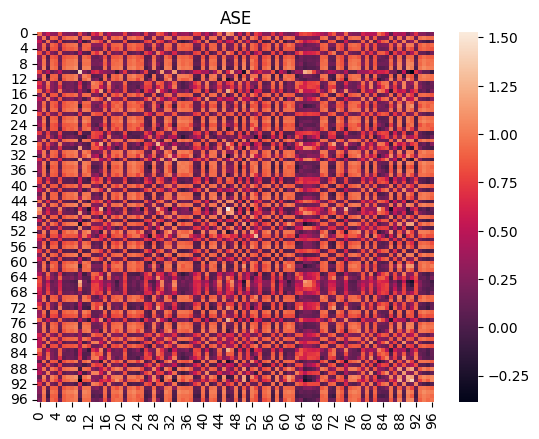

In [12]:
from torch_geometric.utils import to_dense_adj
from graspologic.embed import AdjacencySpectralEmbed 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d = 4
sample = next(iter(data_loader))

adj_matrix = to_dense_adj(sample.edge_index).squeeze(0).numpy()
ase = AdjacencySpectralEmbed(n_components=d, diag_aug=True, algorithm='full')
Xhats = ase.fit_transform(adj_matrix)
print("best error: "+str(np.linalg.norm(Xhats@Xhats.T-adj_matrix)))

plt.figure()
sns.heatmap(Xhats@Xhats.T)
plt.title('ASE')
plt.show(block=False)    
plt.pause(0.001)

In [ ]:
import torch 
from models.RDPG_GD_Unroll_unshared_normalized import GD_Unroll as GD_Unroll_w_norm

d = 4
gd_steps = 5
device = 'cpu'
num_nodes = 500

lase = GD_Unroll_w_norm(d, d, gd_steps)
lase.load_state_dict(torch.load('repo/LASE/saved_models/lase_unshared_d4_normalized_subgraphs.pt'))
lase.to(device)
lase.eval()

In [8]:
from torch_geometric.utils import stochastic_blockmodel_graph, erdos_renyi_graph, to_networkx

from torch_geometric.data import Data

num_nodes = 10
ER = erdos_renyi_graph(num_nodes, 0.5, directed=False)
data = Data(edge_index=ER, num_nodes=num_nodes)
G = to_networkx(data)

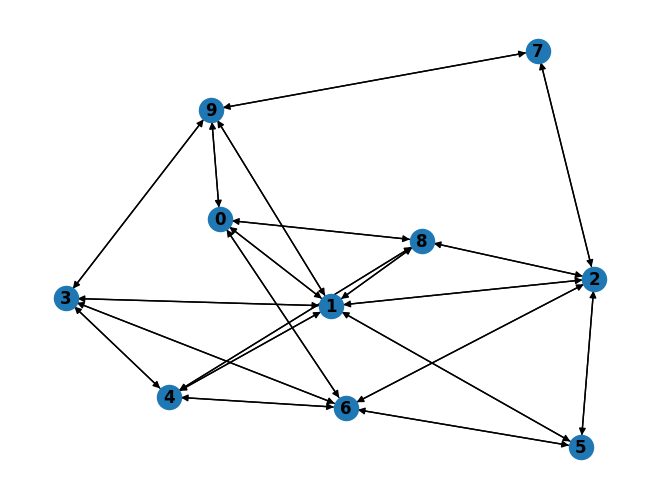

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure()
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

Computing METIS partitioning...
Done!


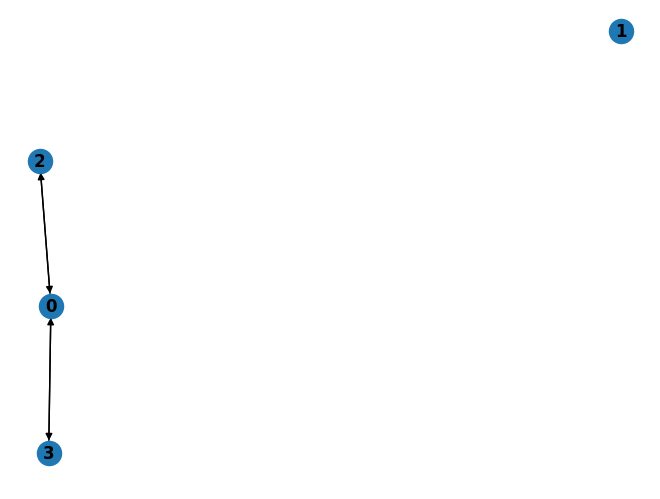

Data(num_nodes=4, edge_index=[2, 4])


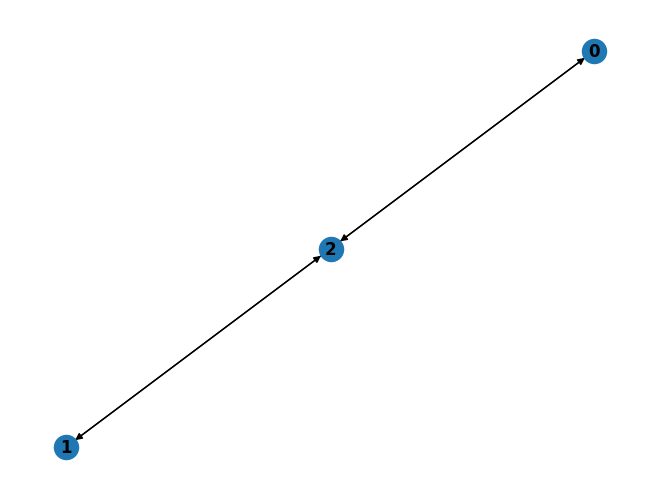

Data(num_nodes=3, edge_index=[2, 4])


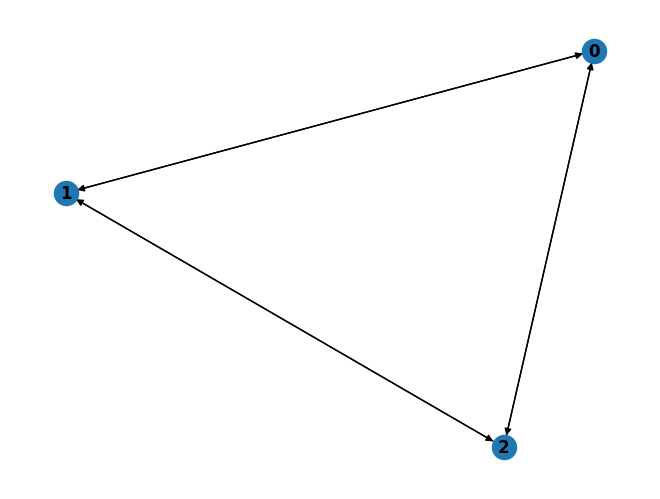

Data(num_nodes=3, edge_index=[2, 6])


In [11]:
from torch_geometric.data import ClusterData
from torch_geometric.loader import ClusterLoader

data_loader = ClusterLoader(ClusterData(data, 3))

for item in data_loader: 
    G = to_networkx(item)
    plt.figure()
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()
    print(item)

In [6]:
# BUILD ORIGINAL GRAPH
import torch
from torch_geometric.loader import DataLoader
from torch_geometric.utils import stochastic_blockmodel_graph, to_dense_adj
from torch_geometric.data import ClusterData, Data
from torch_geometric.loader import ClusterLoader

d=4
device='cpu'
num_nodes = 10000
n = [int(num_nodes/d), int(num_nodes/d),int(num_nodes/d), int(num_nodes/d)]
p = [
     [0.9, 0.1, 0.1, 0.1],
     [0.1, 0.5, 0.1, 0.1],
     [0.1, 0.1, 0.7, 0.1],
     [0.1, 0.1, 0.1, 0.4],
]
edge_index = stochastic_blockmodel_graph(n, p).to(device)





# CREATE SUBGRAPHS
k=100
train_data = []
val_data = []
data_loader = ClusterLoader(ClusterData(Data(edge_index=edge_index, num_nodes=num_nodes), k))

for i, item in enumerate(data_loader):
    x = torch.ones(item.num_nodes,d)
    edge_index_2 = torch.ones([item.num_nodes,item.num_nodes],).nonzero().t().contiguous()
    if i < 80:
        train_data.append(Data(x=x, edge_index=item.edge_index, edge_index_2=edge_index_2))
    else:
        val_data.append(Data(x=x, edge_index=item.edge_index, edge_index_2=edge_index_2))
        
train_loader =  DataLoader(train_data, batch_size=1, shuffle = True)
val_loader =  DataLoader(val_data, batch_size=1, shuffle = False)
    
# model = GD_Unroll(d,d, gd_steps)
# model.to(device)

/home/sofia/lase/lib/python3.10/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.ClusterData' is deprecated, use 'loader.ClusterData' instead
  warnings.warn(out)
Computing METIS partitioning...
Done!


In [7]:
for item in train_loader:
    print(item)

DataBatch(x=[103, 4], edge_index=[2, 9948], edge_index_2=[2, 10609], batch=[103], ptr=[2])
DataBatch(x=[101, 4], edge_index=[2, 5176], edge_index_2=[2, 10201], batch=[101], ptr=[2])
DataBatch(x=[97, 4], edge_index=[2, 3512], edge_index_2=[2, 9409], batch=[97], ptr=[2])
DataBatch(x=[103, 4], edge_index=[2, 9876], edge_index_2=[2, 10609], batch=[103], ptr=[2])
DataBatch(x=[103, 4], edge_index=[2, 8150], edge_index_2=[2, 10609], batch=[103], ptr=[2])
DataBatch(x=[103, 4], edge_index=[2, 5402], edge_index_2=[2, 10609], batch=[103], ptr=[2])
DataBatch(x=[103, 4], edge_index=[2, 8188], edge_index_2=[2, 10609], batch=[103], ptr=[2])
DataBatch(x=[97, 4], edge_index=[2, 4268], edge_index_2=[2, 9409], batch=[97], ptr=[2])
DataBatch(x=[103, 4], edge_index=[2, 8136], edge_index_2=[2, 10609], batch=[103], ptr=[2])
DataBatch(x=[103, 4], edge_index=[2, 5450], edge_index_2=[2, 10609], batch=[103], ptr=[2])
DataBatch(x=[97, 4], edge_index=[2, 4330], edge_index_2=[2, 9409], batch=[97], ptr=[2])
DataBatc